<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# <span style="color:#EF7C8E">Intermediate 2 - Feature Scaling Logistic Regression - Machine Learning </span>
 


## <span style="color:#55BB99"> By: Wejdan Al-Ahmadi</span>
<hr style="border:2px solid gray"> </hr>

## <span style="color:#726060">Objectives:</span>
Perform the feature engineering techniques learned today on the Titanic Dataset. 
* Create a Logistic Regression using the titanic dataset
* Start by making a model that only uses numerical features first and predicts the "survived" column.
* Make different models utilizing the feature engineering techniques learned in class
* Compare your results between validation and test cost functions and report the percent difference between them.
* Save your model using Joblib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

In [2]:
# Load Data
df = sns.load_dataset("titanic")

# filled some NA's
df["embark_town"]=df["embark_town"].fillna('Southampton')
df["embarked"]=df["embarked"].fillna('S')
df["age"]=df["age"].fillna(24)
# I dropped these columns as deck has 80% nulls, and a
#live is the same as survived 
df=df.drop(['deck', 'alive','adult_male'], axis=1)

# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [3]:
train.head()

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
517         0       3    male  24.0      0      0  24.1500        Q   Third   
792         0       3  female  24.0      8      2  69.5500        S   Third   
472         1       2  female  33.0      1      2  27.7500        S  Second   
483         1       3  female  63.0      0      0   9.5875        S   Third   
9           1       2  female  14.0      1      0  30.0708        C  Second   

       who  embark_town  alone  
517    man   Queenstown   True  
792  woman  Southampton  False  
472  woman  Southampton  False  
483  woman  Southampton   True  
9    child    Cherbourg  False

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 517 to 131
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     569 non-null    int64   
 1   pclass       569 non-null    int64   
 2   sex          569 non-null    object  
 3   age          569 non-null    float64 
 4   sibsp        569 non-null    int64   
 5   parch        569 non-null    int64   
 6   fare         569 non-null    float64 
 7   embarked     569 non-null    object  
 8   class        569 non-null    category
 9   who          569 non-null    object  
 10  embark_town  569 non-null    object  
 11  alone        569 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(4)
memory usage: 50.1+ KB


In [5]:
# Model with only numeric features
train.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
embark_town      object
alone              bool
dtype: object

In [6]:
(df.dtypes != "category").values & (df.dtypes != "object").values 

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True])

In [7]:
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

train_numeric = cleaner(train)
val_numeric = cleaner(val)

In [8]:
# Create X, y train and validation sets

target = "survived"

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

0.6783216783216783

In [10]:
pd.concat([X_train, y_train], axis = 1)

pclass   age  sibsp  parch     fare  alone  survived
517       3  24.0      0      0  24.1500   True         0
792       3  24.0      8      2  69.5500  False         0
472       2  33.0      1      2  27.7500  False         1
483       3  63.0      0      0   9.5875   True         1
9         2  14.0      1      0  30.0708  False         1
..      ...   ...    ...    ...      ...    ...       ...
79        3  30.0      0      0  12.4750   True         1
164       3   1.0      4      1  39.6875  False         0
117       2  29.0      1      0  21.0000  False         0
8         3  27.0      0      2  11.1333  False         1
131       3  20.0      0      0   7.0500   True         0

[569 rows x 7 columns]

In [11]:
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    accuracy = accuracy_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    
    ls = [accuracy, recall, precision]
    ls2 = ["Accuracy", "Recall", "Precision"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict



### <span style="color:#EF7C8E">1. Baseline and Logistic Regression: </span>

In [12]:
# Save results to object and print results
print("Baseline:")
b_preds = [y_train.mode() for x in range(len(y_train))]
res0 = calc_cost(y_train, b_preds)
print("\nLogistic Regression:")
res1 = calc_cost(y_train, lr.predict(X_train))

Baseline:
Accuracy: 0.6274165202108963
Recall: 0.0
Precision: 0.0

Logistic Regression:
Accuracy: 0.7293497363796133
Recall: 0.4858490566037736
Precision: 0.6959459459459459


C:\Users\wejda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### <span style="color:#EF7C8E">2. Standard Scaler Model: </span>

In [13]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
lr2 = LogisticRegression()
lr2.fit(X_train_scaled, y_train)
lr2.score(X_val_scaled, y_val)

print("Logistic Regression With Standard Scaler:")
res2 = calc_cost(y_val, lr2.predict(X_val_scaled))

Logistic Regression With Standard Scaler:
Accuracy: 0.6783216783216783
Recall: 0.44642857142857145
Precision: 0.625


### <span style="color:#EF7C8E">3. Robust Scaler Model: </span>

In [14]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_val_robust = scaler2.transform(X_val)

# Train the model
lr3 = LogisticRegression()
lr3.fit(X_train_robust, y_train)
lr3.score(X_val_robust, y_val)

print("Logistic Regression With Robust Scaler:")
res3 = calc_cost(y_val, lr3.predict(X_val_robust))

Logistic Regression With Robust Scaler:
Accuracy: 0.6783216783216783
Recall: 0.44642857142857145
Precision: 0.625


### <span style="color:#EF7C8E">4. MinMax Scaler Model: </span>

In [15]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_val_mm = scaler3.transform(X_val)

# Train the model
lr4 = LogisticRegression()
lr4.fit(X_train_mm, y_train)
lr4.score(X_val_mm, y_val) 

print("Logistic Regression With MinMax Scaler:")
res4 = calc_cost(y_val, lr4.predict(X_val_mm))

Logistic Regression With MinMax Scaler:
Accuracy: 0.6853146853146853
Recall: 0.44642857142857145
Precision: 0.6410256410256411


### <span style="color:#EF7C8E">5. Encoded Model: </span>

In [16]:
train.describe(exclude="number")

sex embarked  class  who  embark_town alone
count    569      569    569  569          569   569
unique     2        3      3    3            3     2
top     male        S  Third  man  Southampton  True
freq     376      422    326  347          422   335

In [19]:
# Im choosing embark_town and class for my one hot encoders
# Extract Date Times

# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["who", "embark_town",'sex','embarked']

# One Hot encode the column
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()
one_hot_df_val = one_hot.transform(val[col_names]).toarray()

In [20]:
# Look at the categories
one_hot.categories_

[array(['child', 'man', 'woman'], dtype=object),
 array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [21]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['who_child',
 'who_man',
 'who_woman',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

In [22]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["who", "embark_town",'sex','embarked']

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [23]:
# Values for each row
one_hot_df

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [24]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=val.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(569, 11)
(143, 11)


In [25]:
# Create train_new df by mergind train and one hot encoded df together and drop color and clarity cols
train_new = train.merge(oh_df, on=train.index).set_index("key_0").drop(["who", "embark_town",'sex','embarked'], axis=1)
val_new = val.merge(oh_df_val, on=val.index).set_index("key_0").drop(["who", "embark_town",'sex','embarked'], axis=1)

print(train_new.shape)
print(val_new.shape)

(569, 19)
(143, 19)


In [26]:
ordinal = OrdinalEncoder()

col_names = ["class"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(train[col_names])
ordinal_ls_val = ordinal.transform(val[col_names])

In [27]:
# Look at categories
ordinal.categories_

[array(['First', 'Second', 'Third'], dtype=object)]

In [28]:
# Add oridnally encoded column to the data
train_new["who"] = ordinal_ls
val_new["who"] = ordinal_ls_val

train_new=train_new.drop(['class'], axis=1)
val_new=val_new.drop(['class'], axis=1)
train_new.sample(5)

survived  pclass   age  sibsp  parch     fare  alone  who_child  \
key_0                                                                    
729           0       3  25.0      1      0   7.9250  False        0.0   
61            1       1  38.0      0      0  80.0000   True        0.0   
610           0       3  39.0      1      5  31.2750  False        0.0   
405           0       2  34.0      1      0  21.0000  False        0.0   
838           1       3  32.0      0      0  56.4958   True        0.0   

       who_man  who_woman  embark_town_Cherbourg  embark_town_Queenstown  \
key_0                                                                      
729        0.0        1.0                    0.0                     0.0   
61         0.0        1.0                    0.0                     0.0   
610        0.0        1.0                    0.0                     0.0   
405        1.0        0.0                    0.0                     0.0   
838        1.0        0.0                    0.0                     0.0   

       embark_town_Southampton  sex_female  sex_male  embarked_C  embarked_Q  \
key_0                                                                          
729                        1.0         1.0       0.0         0.0         0.0   
61                         1.0         1.0       0.0         0.0         0.0   
610                        1.0         1.0       0.0         0.0         0.0   
405                        1.0         0.0       1.0         0.0         0.0   
838                        1.0         0.0       1.0         0.0         0.0   

       embarked_S  who  
key_0                   
729           1.0  2.0  
61            1.0  0.0  
610           1.0  2.0  
405           1.0  1.0  
838           1.0  2.0

In [29]:
target = "survived"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]


lr5 = LogisticRegression()

lr5.fit(X_train, y_train)
lr5.score(X_val, y_val)


res5 =  calc_cost(y_val, lr5.predict(X_val))

Accuracy: 0.8181818181818182
Recall: 0.7678571428571429
Precision: 0.7678571428571429


C:\Users\wejda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### <span style="color:#EF7C8E">6. Scaled & Engineered Model: </span>

In [30]:
# Make a model with scaled and engineered features

# Replace column values with values from scaled data
X_train[['survived','pclass', 'age', 'sibsp', 'parch', 'fare']] = X_train_scaled
X_val[['survived','pclass', 'age', 'sibsp', 'parch', 'fare']] = X_val_scaled

print(X_train.shape)
X_train.head()

(569, 19)


pclass       age     sibsp     parch      fare  alone  who_child  \
key_0                                                                       
517   -0.308315 -0.483564 -0.477058 -0.168276  0.835768   True        0.0   
792   -0.308315  5.933881  1.979468  0.714222 -1.196505  False        0.0   
472    0.379100  0.318617  1.979468 -0.098298 -1.196505  False        0.0   
483    2.670483 -0.483564 -0.477058 -0.451346  0.835768   True        0.0   
9     -1.072110  0.318617 -0.477058 -0.053186 -1.196505  False        1.0   

       who_man  who_woman  embark_town_Cherbourg  embark_town_Queenstown  \
key_0                                                                      
517        1.0        0.0                    0.0                     1.0   
792        0.0        1.0                    0.0                     0.0   
472        0.0        1.0                    0.0                     0.0   
483        0.0        1.0                    0.0                     0.0   
9          0.0        0.0                    1.0                     0.0   

       embark_town_Southampton  sex_female  sex_male  embarked_C  embarked_Q  \
key_0                                                                          
517                        0.0         0.0       1.0         0.0         1.0   
792                        1.0         1.0       0.0         0.0         0.0   
472                        1.0         1.0       0.0         0.0         0.0   
483                        1.0         1.0       0.0         0.0         0.0   
9                          0.0         1.0       0.0         1.0         0.0   

       embarked_S  who  survived  
key_0                             
517           0.0  2.0  0.793351  
792           1.0  2.0  0.793351  
472           1.0  1.0 -0.416882  
483           1.0  2.0  0.793351  
9             0.0  1.0 -0.416882

In [31]:
# Verify that index values match in both datasets
# We expect to see the same number of rows in X_train as the sum value
X_train.shape[0] == sum(X_train.index == y_train.index)

True

In [32]:
# Model
lr6 = LogisticRegression()

lr6.fit(X_train, y_train)
lr6.score(X_val, y_val)

0.8181818181818182

In [33]:
res6 = calc_cost(y_val, lr6.predict(X_val))

Accuracy: 0.8181818181818182
Recall: 0.7678571428571429
Precision: 0.7678571428571429


### <span style="color:#EF7C8E">7. Saving and Loading the Models: </span>

In [34]:
# Used for saving out models
import joblib
import seaborn as sns
import datetime

In [35]:
# Getting a time stamp for today

str(datetime.datetime.today())

'2021-06-22 01:07:22.644505'

In [36]:
# Getting only the date from the time stamp

str(datetime.datetime.today())[:10]

'2021-06-22'

In [37]:
# Save the model as todays date

# Note: these will be saved in a file called models
# Note: if the file does not exist --> create it
# Todays date as string
today = str(datetime.datetime.today())[:10].replace("-", "_")

joblib.dump(scaler, f"./models/scaler_{today}")
joblib.dump(one_hot, f"./models/one_hot_{today}")
joblib.dump(ordinal, f"./models/ordinal_{today}")
joblib.dump(lr6, f"./models/model_{today}")

['./models/model_2021_06_22']

In [38]:
# Load the model
jl_scaler = joblib.load(f"./models/scaler_{today}")
jl_one_hot = joblib.load(f"./models/one_hot_{today}")
jl_ordinal = joblib.load(f"./models/ordinal_{today}")
jl_model = joblib.load(f"./models/model_{today}")

### <span style="color:#EF7C8E">8. Loaded Model: </span>

In [40]:
# Column names for one hot and ordinal encoder
col_names_one_hot = ["who", "embark_town",'sex','embarked']
col_names_ordinal = ["class"]

# Change column order to make addition of scaled features easier
col_order_ls = ['pclass', 'age', 'sibsp', 'parch', 'fare','class','alone'
               ,'who_child',
                 'who_man',
                 'who_woman',
                 'embark_town_Cherbourg',
                 'embark_town_Queenstown',
                 'embark_town_Southampton',
                 'sex_female',
                 'sex_male',
                 'embarked_C',
                 'embarked_Q',
                 'embarked_S']

def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df


def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["who", "embark_town",'sex','embarked']

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names



In [44]:
# Make a Prediction
target = "survived"

# Preprocessing Steps
df = sns.load_dataset("titanic")

#cleaning data 
# filled some NA's
df["embark_town"]=df["embark_town"].fillna('Southampton')
df["embarked"]=df["embarked"].fillna('S')
df["age"]=df["age"].fillna(24)
# I dropped these columns as deck has 80% nulls, and a
#live is the same as survived 
df=df.drop(['deck', 'alive','adult_male'], axis=1)


# Split Data
train, test = train_test_split(df, train_size = .80,test_size =.20,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(train.drop(target, axis=1), train[target],train_size = .80,test_size = .20,random_state=42)

# Choose numeric features only to scale on
train_numeric = cleaner(X_train)
val_numeric = cleaner(X_val)

#test_numeric=test_numeric.drop(target, axis=1)


# Scale Data
jl_X_train_scaled = jl_scaler.transform(train_numeric)
jl_X_val_scaled = jl_scaler.transform(val_numeric)

# Create column names for one hot encoding
column_names = col_names(jl_one_hot)

# One Hot encode the column
jl_one_hot_df = jl_one_hot.transform(X_train[col_names_one_hot]).toarray()
jl_one_hot_df_val = jl_one_hot.transform(X_val[col_names_one_hot]).toarray()

# Cast One Hot Encoded values into a dataframe
jl_oh_df = pd.DataFrame(jl_one_hot_df,index=X_train.index,columns = column_names)
jl_oh_df_val = pd.DataFrame(jl_one_hot_df_val,index=X_val.index,columns = column_names)

# Create jl_train_new df by merging train and one hot encoded df together and drop color and clarity cols
jl_train_new = X_train.merge(jl_oh_df, on=X_train.index).set_index("key_0").drop(["who", "embark_town",'sex','embarked'], axis=1)
jl_val_new = X_val.merge(jl_oh_df_val, on=X_val.index).set_index("key_0").drop(["who", "embark_town",'sex','embarked'], axis=1)

# Ordinal encode the column
jl_ordinal_ls = jl_ordinal.transform(jl_train_new[col_names_ordinal])
jl_ordinal_ls_val = jl_ordinal.transform(jl_val_new[col_names_ordinal])

# Add oridnally encoded column to the data
jl_train_new["class"] = jl_ordinal_ls
jl_val_new["class"] = jl_ordinal_ls_val

# Re order columns
X_train = jl_train_new[col_order_ls]
X_val = jl_val_new[col_order_ls]

# Replace column values with values from scaled data
X_train[['survived','pclass', 'age', 'sibsp', 'parch', 'fare']] = jl_X_train_scaled
X_val[['survived','pclass', 'age', 'sibsp', 'parch', 'fare']] = jl_X_val_scaled

# Score the model
jl_model.score(X_val, y_val)

0.40559440559440557

In [45]:
# Compare with actual model
# Should have this model in memory, if not then run the code for the model above

lr6.score(X_val, y_val)

0.40559440559440557

In [46]:
jl_model.score(X_val, y_val)

0.40559440559440557

In [47]:
# Check to see exact predictions are being made for reproducibiblity
sum(jl_model.predict(X_val) == lr6.predict(X_val))

143

In [48]:
print("Loaded Model")
loaded_preds = jl_model.predict(X_val)
res7 = calc_cost(y_val, loaded_preds)
print("\nLinear Regression 6")
calc_cost(y_val, lr6.predict(X_val));

Loaded Model
Accuracy: 0.40559440559440557
Recall: 0.8571428571428571
Precision: 0.384

Linear Regression 6
Accuracy: 0.40559440559440557
Recall: 0.8571428571428571
Precision: 0.384


### <span style="color:#EF7C8E">9. Plotting Cost Functions: </span>

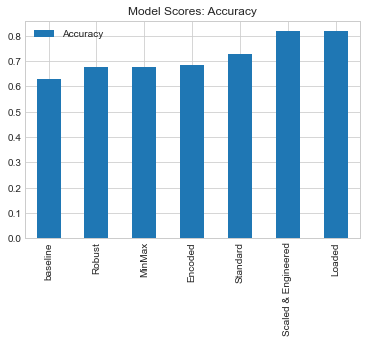

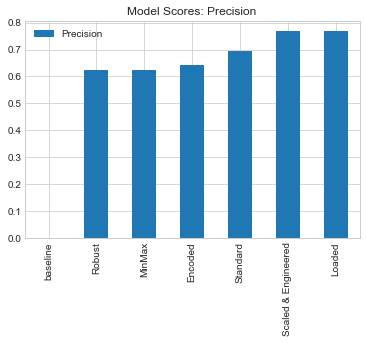

In [49]:
model_ls = ["baseline", "Standard", "Robust", "MinMax", "Encoded", "Scaled & Engineered", "Loaded"]
result_ls = [res0, res1, res2, res3, res4, res5, res6]

res_df = pd.DataFrame(result_ls, index=model_ls)

for x in ["Accuracy", "Recall", "Precision"]:
    res_df.loc[:,res_df.columns == x].sort_values(by=x).plot(kind="bar", title=f"Model Scores: {x}")

### <span style="color:#EF7C8E">10. Calculating % of decrease in cost functions: </span>

In [52]:
delta_accuracy = ((res1['Accuracy']- res6['Accuracy'])/res1['Accuracy'])*100
delta_recall = ((res1['Recall']- res6['Recall'])/res1['Recall'])*100
delta_precision = ((res1['Precision']- res6['Precision'])/res1['Precision'])*100

delta_ls = [round(delta_accuracy), round(delta_recall), round(delta_precision)]
delta_ls2 = ["Accuracy % decrease", "Recall % decrease", "Precision % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")
        

Accuracy % decrease: -12
Recall % decrease: -58
Precision % decrease: -10
